# 2 Data wrangling<a id='2_Data_wrangling'></a>

files modifications:  7/24/21 11:35 

## 2.1 Contents<a id='2.1_Contents'></a>
* [2 Data wrangling](#2_Data_wrangling)
  * [2.1 Contents](#2.1_Contents)
  * [2.2 Introduction](#2.2_Introduction)
    * [2.2.1 Recap Of the Data Science Problem](#2.2.1_Recap_Of_Data_Science_Problem)
  * [2.3 Imports](#2.3_Imports)
  * [2.4 Objectives](#2.4_Objectives)
  * [2.5 Load The Ski Resort Data](#2.5_Load_The_Ski_Resort_Data)
  * [2.6 Explore The Data](#2.6_Explore_The_Data)
    * [2.6.1 Find Your Resort Of Interest](#2.6.1_Find_Your_Resort_Of_Interest)
    * [2.6.2 Number Of Missing Values By Column](#2.6.2_Number_Of_Missing_Values_By_Column)
    * [2.6.3 Categorical Features](#2.6.3_Categorical_Features)
      * [2.6.3.1 Unique Resort Names](#2.6.3.1_Unique_Resort_Names)
      * [2.6.3.2 Region And State](#2.6.3.2_Region_And_State)
      * [2.6.3.3 Number of distinct regions and states](#2.6.3.3_Number_of_distinct_regions_and_states)
      * [2.6.3.4 Distribution Of Resorts By Region And State](#2.6.3.4_Distribution_Of_Resorts_By_Region_And_State)
      * [2.6.3.5 Distribution Of Ticket Price By State](#2.6.3.5_Distribution_Of_Ticket_Price_By_State)
        * [2.6.3.5.1 Average weekend and weekday price by state](#2.6.3.5.1_Average_weekend_and_weekday_price_by_state)
        * [2.6.3.5.2 Distribution of weekday and weekend price by state](#2.6.3.5.2_Distribution_of_weekday_and_weekend_price_by_state)
    * [2.6.4 Numeric Features](#2.6.4_Numeric_Features)
      * [2.6.4.1 Numeric data summary](#2.6.4.1_Numeric_data_summary)
      * [2.6.4.2 Distributions Of Feature Values](#2.6.4.2_Distributions_Of_Feature_Values)
        * [2.6.4.2.1 SkiableTerrain_ac](#2.6.4.2.1_SkiableTerrain_ac)
        * [2.6.4.2.2 Snow Making_ac](#2.6.4.2.2_Snow_Making_ac)
        * [2.6.4.2.3 fastEight](#2.6.4.2.3_fastEight)
        * [2.6.4.2.4 fastSixes and Trams](#2.6.4.2.4_fastSixes_and_Trams)
  * [2.7 Derive State-wide Summary Statistics For Our Market Segment](#2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment)
  * [2.8 Drop Rows With No Price Data](#2.8_Drop_Rows_With_No_Price_Data)
  * [2.9 Review distributions](#2.9_Review_distributions)
  * [2.10 Population data](#2.10_Population_data)
  * [2.11 Target Feature](#2.11_Target_Feature)
    * [2.11.1 Number Of Missing Values By Row - Resort](#2.11.1_Number_Of_Missing_Values_By_Row_-_Resort)
  * [2.12 Save data](#2.12_Save_data)
  * [2.13 Summary](#2.13_Summary)


## 2.2 Introduction<a id='2.2_Introduction'></a>

This step focuses on collecting data, organizing it, and making sure it is well defined. Some data cleaning done at this stage, but most cleaning left to be performed after further data exploration, to better understand it.

### 2.2.1 Recap the Of Data Science Problem<a id='2.2.1_Recap_Of_Data_Science_Problem'></a>

The purpose of this data science project is to come up with a pricing model for ski resort tickets in our market segment. Big Mountain suspects it may not be maximizing its returns, relative to its position in the market. It also does not have a strong sense of what facilities matter most to visitors, particularly which ones they're most likely to pay more for. This project aims to build a predictive model for ticket price based on a number of facilities, or properties. 
This model will be used to provide guidance for Big Mountain's pricing and future facility investment plans.

## 2.3 Imports<a id='2.3_Imports'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
from library.sb_utils import save_file

## 2.4 Objectives<a id='2.4_Objectives'></a>

In this notebook I will tackle the following fundamental questions:

* Do I have the data I need to tackle the desired busines problem?
    * What is the required target value?
    * Do I have the potentially useful features?
* Are there any fundamental issues with the data?

## 2.5 Load The Ski Resort Data<a id='2.5_Load_The_Ski_Resort_Data'></a>

In [2]:
# CSV data file, in the raw_data directory
ski_data = pd.read_csv('../raw_data/ski_resort_data.csv')

In [3]:
# see a summary of all data features
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               330 non-null    object 
 1   Region             330 non-null    object 
 2   state              330 non-null    object 
 3   summit_elev        330 non-null    int64  
 4   vertical_drop      330 non-null    int64  
 5   base_elev          330 non-null    int64  
 6   trams              330 non-null    int64  
 7   fastEight          164 non-null    float64
 8   fastSixes          330 non-null    int64  
 9   fastQuads          330 non-null    int64  
 10  quad               330 non-null    int64  
 11  triple             330 non-null    int64  
 12  double             330 non-null    int64  
 13  surface            330 non-null    int64  
 14  total_chairs       330 non-null    int64  
 15  Runs               326 non-null    float64
 16  TerrainParks       279 non

What quantity should I model, Weekend or Weekday ticket price?

In [4]:
# explore first several rows
ski_data.head()

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
0,Alyeska Resort,Alaska,Alaska,3939,2500,250,1,0.0,0,2,...,1.0,1610.0,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550.0
1,Eaglecrest Ski Area,Alaska,Alaska,2600,1540,1200,0,0.0,0,0,...,2.0,640.0,60.0,45.0,44.0,350.0,47.0,53.0,90.0,NaN
2,Hilltop Ski Area,Alaska,Alaska,2090,294,1796,0,0.0,0,0,...,1.0,30.0,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30.0
3,Arizona Snowbowl,Arizona,Arizona,11500,2300,9200,0,0.0,1,0,...,2.0,777.0,104.0,122.0,81.0,260.0,89.0,89.0,122.0,NaN
4,Sunrise Park Resort,Arizona,Arizona,11100,1800,9200,0,NaN,0,1,...,1.2,800.0,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80.0


There's a missing value spotted in the `fastEight` column

## 2.6 Explore The Data<a id='2.6_Explore_The_Data'></a>

### 2.6.1 Finding the Resort Of Interest<a id='2.6.1_Find_Your_Resort_Of_Interest'></a>

In [5]:
# Filter ski_data dataframe to display the row for our resort 
ski_data[ski_data.Name == 'Big Mountain Resort'].T

,151
Name,Big Mountain Resort
Region,Montana
state,Montana
summit_elev,6817
vertical_drop,2353
base_elev,4464
trams,0
fastEight,0
fastSixes,0
fastQuads,3


Resort doesn't appear to have any missing values.

### 2.6.2 Number Of Missing Values By Column<a id='2.6.2_Number_Of_Missing_Values_By_Column'></a>

Counting the number of missing values in each column and sorting them out:

In [6]:
ski_dt = ski_data

In [7]:
ski_dt_T =ski_dt.T
ski_dt_T.head()

,0,1,2,3,4,5,6,7,8,9,...,320,321,322,323,324,325,326,327,328,329
Name,Alyeska Resort,Eaglecrest Ski Area,Hilltop Ski Area,Arizona Snowbowl,Sunrise Park Resort,Yosemite Ski & Snowboard Area,Bear Mountain,Bear Valley,Boreal Mountain Resort,Dodge Ridge,...,Whitecap Mountain,Wilmot Mountain,Grand Targhee Resort,Hogadon Basin,Jackson Hole,Meadowlark Ski Lodge,Sleeping Giant Ski Resort,Snow King Resort,Snowy Range Ski & Recreation Area,White Pine Ski Area
Region,Alaska,Alaska,Alaska,Arizona,Arizona,Northern California,Sierra Nevada,Sierra Nevada,Sierra Nevada,Sierra Nevada,...,Wisconsin,Wisconsin,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming
state,Alaska,Alaska,Alaska,Arizona,Arizona,California,California,California,California,California,...,Wisconsin,Wisconsin,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming,Wyoming
summit_elev,3939,2600,2090,11500,11100,7800,8805,8500,7700,8200,...,1750,1030,9920,8000,10450,9500,7428,7808,9663,9500
vertical_drop,2500,1540,294,2300,1800,600,1665,1900,500,1600,...,400,230,2270,640,4139,1000,810,1571,990,1100


In [8]:
missing_c = ski_dt.isnull().sum()
missing_p = 100*ski_data.isnull().mean()

ski_dt_T['count'] = missing_c.to_frame()
ski_dt_T['%'] = missing_p.to_frame()

ski_dt_T_sort =ski_dt_T.sort_values('%',ascending=False)
ski_dt_T_sort[['count','%']].head(14)

,count,%
fastEight,166,50.303030
NightSkiing_ac,143,43.333333
AdultWeekday,54,16.363636
AdultWeekend,51,15.454545
daysOpenLastYear,51,15.454545
TerrainParks,51,15.454545
projectedDaysOpen,47,14.242424
Snow Making_ac,46,13.939394
averageSnowfall,14,4.242424
LongestRun_mi,5,1.515152


`fastEight` has the most missing values, at just over 50%.  also missing quite a few of your desired target quantity, the ticket price, which is missing 15-16% of values. AdultWeekday is missing in a few more records than AdultWeekend. 

### 2.6.3 Categorical Features<a id='2.6.3_Categorical_Features'></a>

In [9]:
#select columns of dtype 'object'
ski_data.select_dtypes(include = object).head(10)

,Name,Region,state
0,Alyeska Resort,Alaska,Alaska
1,Eaglecrest Ski Area,Alaska,Alaska
2,Hilltop Ski Area,Alaska,Alaska
3,Arizona Snowbowl,Arizona,Arizona
4,Sunrise Park Resort,Arizona,Arizona
5,Yosemite Ski & Snowboard Area,Northern California,California
6,Bear Mountain,Sierra Nevada,California
7,Bear Valley,Sierra Nevada,California
8,Boreal Mountain Resort,Sierra Nevada,California
9,Dodge Ridge,Sierra Nevada,California


-	Name  , Region, state: These three columns had no missing values
-	Name isn’t unique, but combination of (Name+Region)/(Name+state) Is.
-	Region is NOT always the same as state

#### 2.6.3.1 Unique Resort Names<a id='2.6.3.1_Unique_Resort_Names'></a>

In [10]:
# `value_counts` to find any duplicated resort names
ski_data['Name'].value_counts().head()

Crystal Mountain     2
Angel Fire Resort    1
Gunstock             1
Loveland             1
Bear Valley          1
Name: Name, dtype: int64

I have a duplicated resort name: Crystal Mountain.

But is this resort duplicated if I take into account Region and/or state as well?

In [11]:
#Concatenate string columns 'Name' with 'Region' and count the values again (as above)
(ski_data['Name'] + ', ' + ski_data['Region']).value_counts().head()

Seven Springs, Pennsylvania             1
Brighton Resort, Salt Lake City         1
Nubs Nob Ski Area, Michigan             1
Mulligan's Hollow Ski Bowl, Michigan    1
Killington Resort, Vermont              1
dtype: int64

In [12]:
#Concatenate 'Name' with 'state' and count the values again (as above)
(ski_data['Name'] + ', ' + ski_data['state']).value_counts().head()

Seven Springs, Pennsylvania               1
Deer Mountain Ski Resort, South Dakota    1
Mount Sunapee, New Hampshire              1
Nubs Nob Ski Area, Michigan               1
Mulligan's Hollow Ski Bowl, Michigan      1
dtype: int64

In [13]:
ski_data[ski_data['Name'] == 'Crystal Mountain']

,Name,Region,state,summit_elev,vertical_drop,base_elev,trams,fastEight,fastSixes,fastQuads,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac
104,Crystal Mountain,Michigan,Michigan,1132,375,757,0,0.0,0,1,...,0.3,102.0,96.0,120.0,63.0,132.0,54.0,64.0,135.0,56.0
295,Crystal Mountain,Washington,Washington,7012,3100,4400,1,NaN,2,2,...,2.5,2600.0,10.0,NaN,57.0,486.0,99.0,99.0,NaN,NaN


There are two Crystal Mountain resorts, but they are clearly two different resorts in two different states. This is a powerful signal that we have unique records on each row.

#### 2.6.3.2 Region And State<a id='2.6.3.2_Region_And_State'></a>

What's the relationship between region and state?

In [14]:
#Calculate the number of times Region does not equal state
(ski_data.Region != ski_data.state).sum()

33

In [15]:
ski_data['Region'].value_counts().head()

New York         33
Michigan         29
Sierra Nevada    22
Colorado         22
Pennsylvania     19
Name: Region, dtype: int64

A casual inspection by eye reveals some non-state names such as Sierra Nevada, Salt Lake City, and Northern California. Tabulate the differences between Region and state. 

In [16]:
# Filter the dataframe for rows where 'Region' and 'state' are different,
# groupby 'state' then performing `value_counts` on the 'Region'
ski_data[ski_data.Region != ski_data.state].groupby('state')['Region'].value_counts()

state       Region             
California  Sierra Nevada          20
            Northern California     1
Nevada      Sierra Nevada           2
Oregon      Mt. Hood                4
Utah        Salt Lake City          6
Name: Region, dtype: int64

The vast majority of the differences are in California, with most Regions being called Sierra Nevada and just one referred to as Northern California.

#### 2.6.3.3 Number of distinct regions and states<a id='2.6.3.3_Number_of_distinct_regions_and_states'></a>

In [17]:
# Select 'Region' and 'state' columns 
# calculate the number of unique values in each
ski_data[['Region', 'state']].nunique()

Region    38
state     35
dtype: int64

Because a few states are split across multiple named regions, there are slightly more unique regions than states.

#### 2.6.3.4 Distribution Of Resorts By Region And State<a id='2.6.3.4_Distribution_Of_Resorts_By_Region_And_State'></a>

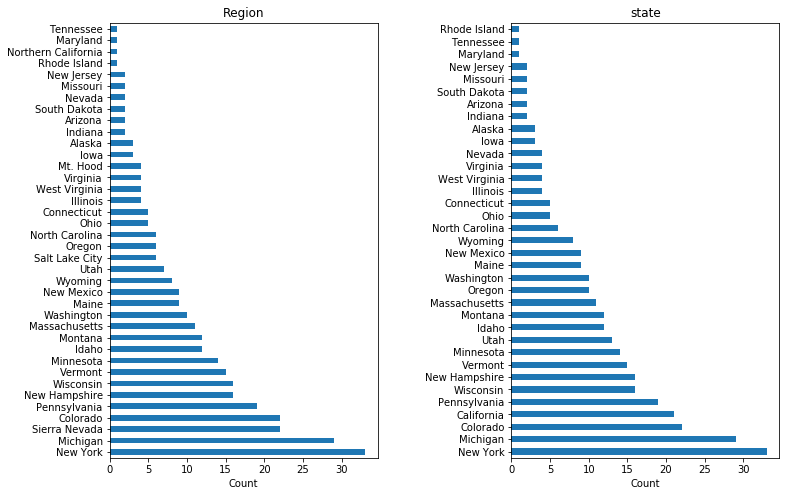

In [18]:
# Create two subplots on 1 row and 2 columns
fig, ax = plt.subplots(1, 2, figsize=(12,8))

# Specify a horizontal barplot for Region
ski_data.Region.value_counts().plot(kind='barh', ax=ax[0])

# title the Region plot
ax[0].set_title('Region')

# Label the xaxis 
ax[0].set_xlabel('Count')

# Specify a horizontal barplot for state
ski_data.state.value_counts().plot(kind='barh', ax=ax[1])

# title the state plot
ax[1].set_title('state')

# Label the state xaxis 
ax[1].set_xlabel('Count')

# create some plot "space"  
plt.subplots_adjust(wspace=0.5);

New York accounting for the majority of resorts. Our target resort is in Montana, which comes in at 13th place.

In [19]:
# The Total 'Montana' records in our data set
(ski_data['state']== 'Montana').sum()

12

### Should I create Montana-specific Model or All- state model?

Does New York command a premium because of its proximity to population?

Even if a resort's State were a useful predictor of ticket price, our main interest lies in Montana. Would we want a model that is skewed for accuracy by New York? Should we just filter for Montana and create a Montana-specific model? This would slash the available data volume (12 resorts' records, as shown above). 

Refering to problem task's contextual insight; that the data are for resorts all belonging to the same market share. This suggests one might expect prices to be similar amongst them. I will look into this, with a boxplot grouped by State, to compare prices between the states.


A side note worth bringing up here is that, in reality, the best approach here definitely would include consulting with the client or other domain expert. They might know of good reasons for treating states equivalently or differently. 

#### 2.6.3.5 Distribution Of Ticket Price By State<a id='2.6.3.5_Distribution_Of_Ticket_Price_By_State'></a>

##### 2.6.3.5.1 Average weekend and average weekday price by state<a id='2.6.3.5.1_Average_weekend_and_weekday_price_by_state'></a>

In [20]:
# Calculate and sort average weekday and weekend price by state
state_price_means = ski_data.groupby('state')[['AdultWeekday', 'AdultWeekend']].mean()
state_price_means.head()

,AdultWeekday,AdultWeekend
state,,
Alaska,47.333333,57.333333
Arizona,81.500000,83.500000
California,78.214286,81.416667
Colorado,90.714286,90.714286
Connecticut,47.800000,56.800000


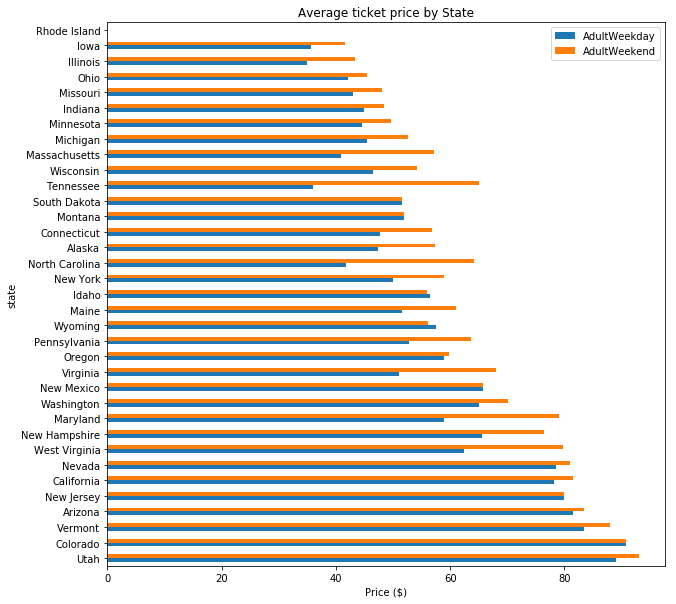

In [21]:
# reorders the index by increasing average of weekday and weekend prices
(state_price_means.reindex(index=state_price_means.mean(axis=1)
    .sort_values(ascending=False)
    .index)
    .plot(kind='barh', figsize=(10, 10), title='Average ticket price by State'))
plt.xlabel('Price ($)');

In [22]:
# ###Lib self notes
# # otherwize without " .reindex ":
# state_price_means.plot(kind='barh', figsize=(10, 10), title='Average ticket price by State')
# plt.xlabel('Price ($)');

From the figure above we can see how the average ticket price varies from state to state.

##### 2.6.3.5.2 Distribution of weekday and weekend price by state<a id='2.6.3.5.2_Distribution_of_weekday_and_weekend_price_by_state'></a>

Next, I will transform the data into a single column for price with a new categorical column that represents the **ticket type**.

In [23]:
# transform data using melt(), so we could later use it in seaborn boxplot
ticket_prices = pd.melt(ski_data[['state', 'AdultWeekday','AdultWeekend']], 
                        id_vars='state', 
                        var_name='Ticket', 
                        value_vars=['AdultWeekday','AdultWeekend'], 
                        value_name='Price')

In [24]:
ticket_prices.head()

,state,Ticket,Price
0,Alaska,AdultWeekday,65.0
1,Alaska,AdultWeekday,47.0
2,Alaska,AdultWeekday,30.0
3,Arizona,AdultWeekday,89.0
4,Arizona,AdultWeekday,74.0


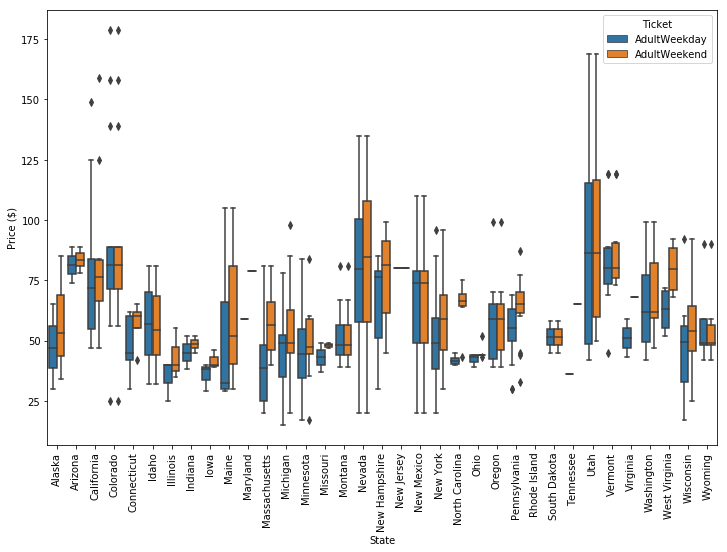

In [25]:
#Creating a seaborn boxplot of the ticket price with 'state'(x-axis),'Price'(y-axis), and hue:(indicates 'Ticket type')
plt.subplots(figsize=(12, 8))
sns.boxplot(x='state', y='Price', hue='Ticket', data=ticket_prices)
plt.xticks(rotation='vertical')
plt.ylabel('Price ($)')
plt.xlabel('State');

Aside from some relatively expensive ticket prices in California, Colorado, and Utah, most prices appear to lie in a broad band from around 25 to over 100 dollars. Some States show more variability than others. Montana and South Dakota, for example, both show fairly small variability as well as matching weekend and weekday ticket prices. Nevada and Utah, on the other hand, show the most range in prices. Some States, notably North Carolina and Virginia, have weekend prices far higher than weekday prices. Although I could be inspired from this exploration to consider a few potential groupings of resorts, those with low spread, those with lower averages, and those that charge a premium for weekend tickets. However, as mentioned before, I was told that i should take all resorts to be part of the same market share, therefore I’ll decide to retain all State information

### 2.6.4 Numeric Features<a id='2.6.4_Numeric_Features'></a>

#### 2.6.4.1 Numeric data summary<a id='2.6.4.1_Numeric_data_summary'></a>

In [26]:
# statistical summary view of the numerical columns
ski_data.describe().T

,count,mean,std,min,25%,50%,75%,max
summit_elev,330.0,4591.818182,3735.535934,315.0,1403.75,3127.5,7806.00,13487.0
vertical_drop,330.0,1215.427273,947.864557,60.0,461.25,964.5,1800.00,4425.0
base_elev,330.0,3374.000000,3117.121621,70.0,869.00,1561.5,6325.25,10800.0
trams,330.0,0.172727,0.559946,0.0,0.00,0.0,0.00,4.0
fastEight,164.0,0.006098,0.078087,0.0,0.00,0.0,0.00,1.0
fastSixes,330.0,0.184848,0.651685,0.0,0.00,0.0,0.00,6.0
fastQuads,330.0,1.018182,2.198294,0.0,0.00,0.0,1.00,15.0
quad,330.0,0.933333,1.312245,0.0,0.00,0.0,1.00,8.0
triple,330.0,1.500000,1.619130,0.0,0.00,1.0,2.00,8.0
double,330.0,1.833333,1.815028,0.0,1.00,1.0,3.00,14.0


In [27]:
# checking how many weekend vs weekday vs both records are missing
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)
missing_price.value_counts()/len(missing_price) * 100

0    82.424242
2    14.242424
1     3.333333
dtype: float64

Just over 82% of resorts have no missing ticket price, 3% are missing one value, and 14% are missing both. I will drop the records for which th is no price information, but only after recieving a fuller pictire for rest of the features.

#### 2.6.4.2 Distributions Of Feature Values<a id='2.6.4.2_Distributions_Of_Feature_Values'></a>

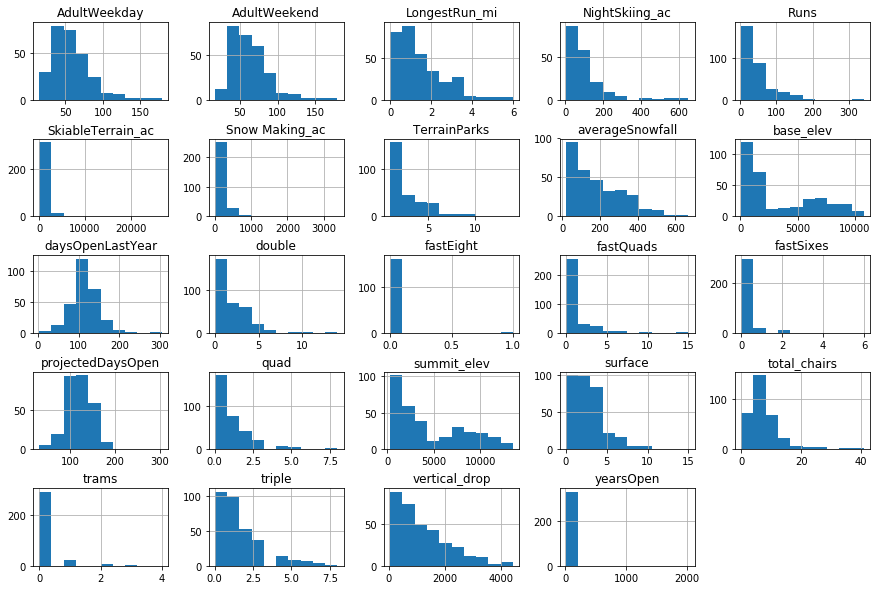

In [28]:
# plotting histograms of each of the numeric features
ski_data.hist(figsize=(15,10))

# adjustments for a legible and easy-to-read plots
plt.subplots_adjust(hspace=0.5);

Some of the following features are possibly a cause for concern:

- SkiableTerrain_ac - because values are clustered down the low end,
- Snow Making_ac - for the same reason,
- fastEight - because all but one value is 0 so it has a minimal variance, and half the values are missing,
- fastSixes - raises an amber flag; it has more variability, but still mostly 0,
- trams- also may get an amber flag for the same reason,
- yearsOpen - because most values are low, it has a maximum of 2019, which strongly suggests someone recorded calendar year rather than the number of years.

##### 2.6.4.2.1 SkiableTerrain_ac<a id='2.6.4.2.1_SkiableTerrain_ac'></a>

In [29]:
# checking skiableTerrain values greater than 10000
ski_data.SkiableTerrain_ac[ski_data.SkiableTerrain_ac > 10000]

39    26819.0
Name: SkiableTerrain_ac, dtype: float64

One resort has an incredibly large skiable terrain area! 

In [30]:
# investigate this resort
ski_data[ski_data.SkiableTerrain_ac > 10000].T

,39
Name,Silverton Mountain
Region,Colorado
state,Colorado
summit_elev,13487
vertical_drop,3087
base_elev,10400
trams,0
fastEight,0
fastSixes,0
fastQuads,0


#### Dealing with suspicious record
Silverton Mountain Resort has 26,819 skiable terrain in ac
According this [useful information](https://silvertonmountain.com/mountain/), I found that the real value is 1,819 ac.

In [31]:
# The'SkiableTerrain_ac' value for this resort
ski_data.loc[39, 'SkiableTerrain_ac']

26819.0

In [32]:
# modify this value with the correct value 9
ski_data.loc[39, 'SkiableTerrain_ac'] = 1819

In [33]:
#verify that the value has been modified
ski_data.loc[39, 'SkiableTerrain_ac']

1819.0

What does the distribution of skiable area look like now?

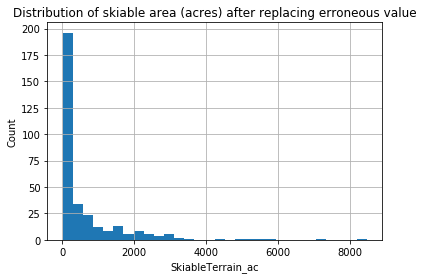

In [34]:
ski_data.SkiableTerrain_ac.hist(bins=30)
plt.xlabel('SkiableTerrain_ac')
plt.ylabel('Count')
plt.title('Distribution of skiable area (acres) after replacing erroneous value');

Although it is still a long tailed distribution, most extreme value now is slightly above 8000, which make this above distribution more plausible.

##### 2.6.4.2.2 Snow Making_ac<a id='2.6.4.2.2_Snow_Making_ac'></a>

In [35]:
ski_data['Snow Making_ac'][ski_data['Snow Making_ac'] > 1000]

11    3379.0
18    1500.0
Name: Snow Making_ac, dtype: float64

In [36]:
ski_data[ski_data['Snow Making_ac'] > 3000].T

,11
Name,Heavenly Mountain Resort
Region,Sierra Nevada
state,California
summit_elev,10067
vertical_drop,3500
base_elev,7170
trams,2
fastEight,0
fastSixes,2
fastQuads,7


here, in their website [Heavenly Mountain Resort](https://www.skiheavenly.com/the-mountain/about-the-mountain/mountain-info.aspx). We see that we have values for skiable terrain that agree. Furthermore, It says that snowmaking covers 60% of the trails.

We can calculate the area covered by snowmaking:

In [37]:
.6 * 4800

2880.0

This is less than the value of 3379 in our data. We can adjust it, however, there is no ticket pricing information at all for this resort. Any further effort spent about the values for this resort will be wasted. I'll simply be dropping the entire row.

##### 2.6.4.2.3 fastEight<a id='2.6.4.2.3_fastEight'></a>

Look at the different fastEight values more closely:

In [38]:
ski_data.fastEight.value_counts()

0.0    163
1.0      1
Name: fastEight, dtype: int64

Half the values are missing and all but one zeros. There is essentially no information in this column. so it will be dropped entirety

In [39]:
# Dropping 'fastEight' column
ski_data.drop(columns='fastEight', inplace=True)

In [40]:
ski_data.shape 
# original shape was (330,27) 

(330, 26)

###### yearsOpen

In [41]:
# Filter for values greater than 100
ski_data.yearsOpen[ski_data.yearsOpen > 100]

34      104.0
115    2019.0
Name: yearsOpen, dtype: float64

One seems to have been open for 104 years and another for 2019 years. This is most likely wrong.

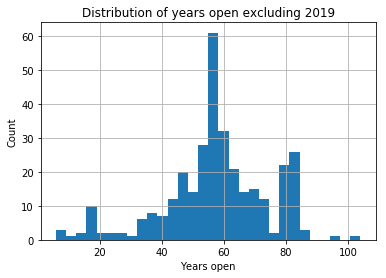

In [42]:
# plot histogram for yearsOpen without the erroneous record
ski_data.yearsOpen[ski_data.yearsOpen < 1000].hist(bins=30)

plt.xlabel('Years open')
plt.ylabel('Count')
plt.title('Distribution of years open excluding 2019');

The above distribution of years seems entirely plausible, including the 104 year value. We can certainly state that no resort will have been open for 2019 years It likely means the resort opened in 2019 or it could also mean the resort is due to open in 2019 (as we don't know when these data were gathered).

Let's review the summary statistics for the years under 1000.

In [43]:
ski_data.yearsOpen[ski_data.yearsOpen < 1000].describe()

count    328.000000
mean      57.695122
std       16.841182
min        6.000000
25%       50.000000
50%       58.000000
75%       68.250000
max      104.000000
Name: yearsOpen, dtype: float64

from the above summary statistics, the smallest number of years open otherwise is 6. We can't be sure whether this resort in question has been open zero years or two years and even whether the numbers are projections or actual. In any case, we won't be adding a new youngest resort so it best to drop this row.

In [44]:
# dropping this record
ski_data = ski_data[ski_data.yearsOpen < 1000]

In [45]:
ski_data.shape

(328, 26)

##### 2.6.4.2.4 fastSixes and Trams<a id='2.6.4.2.4_fastSixes_and_Trams'></a>

The other features had mild concern over, so I will leave the data as it is.

## 2.7 Derive State-wide Summary Statistics For Our Market Segment<a id='2.7_Derive_State-wide_Summary_Statistics_For_Our_Market_Segment'></a>

By this point one row was removed for a resort that may not have opened yet (or in its firsts seasons). Basic business knowledge tells us that state-wide supply and demand of certain skiing resources may well factor into pricing strategies. Does our resort dominate some area?

We should use all feature records of the data that can capture the state-wide market statistics, **before** dropping any more rows.

Features that may be interesting are:

* TerrainParks
* SkiableTerrain_ac
* daysOpenLastYear
* NightSkiing_ac

It makes sense to sum these features to to captures the state-wide market size: the total number of terrain parks, the total skiable area, the total number of days open, and the total area available for night skiing. 

Note: We might consider the total number of ski runs, but perhapse skiable area is more informative than just a number of runs.

In [46]:
# Adding aggregated columns of sum of features to new 'state_total_..' columns'

state_summary = ski_data.groupby('state').agg(
    resorts_per_state=pd.NamedAgg(column='Name', aggfunc='count'),
    state_total_skiable_area_ac= pd.NamedAgg(column='SkiableTerrain_ac', aggfunc='sum'),
    state_total_days_open= pd.NamedAgg(column='daysOpenLastYear', aggfunc='sum'),
    state_total_terrain_parks= pd.NamedAgg(column='TerrainParks', aggfunc='sum'),
    state_total_night_skiing_ac= pd.NamedAgg(column='NightSkiing_ac', aggfunc='sum')).reset_index()
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_night_skiing_ac
0,Alaska,3,2280.0,345.0,4.0,580.0
1,Arizona,2,1577.0,237.0,6.0,80.0
2,California,21,25948.0,2738.0,81.0,587.0
3,Colorado,22,43682.0,3258.0,74.0,428.0
4,Connecticut,5,358.0,353.0,10.0,256.0


## 2.8 Drop Rows With No Price Data<a id='2.8_Drop_Rows_With_No_Price_Data'></a>

There are two columns that refer to price: 'AdultWeekend' and 'AdultWeekday'. 

In [47]:
# calculating missing price values for those columns
missing_price = ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum(axis=1)

In [48]:
ski_data.shape

(328, 26)

About 14% of the rows have no price data. As the price is your target, these rows are of no use, and will be dropped.

In [49]:
# remove rows from ski_data where both price values are missing
ski_data = ski_data[missing_price != 2]

In [50]:
ski_data.shape

(281, 26)

In [51]:
# number of rows that were removed:
328-281

47

## 2.9 Review distributions<a id='2.9_Review_distributions'></a>

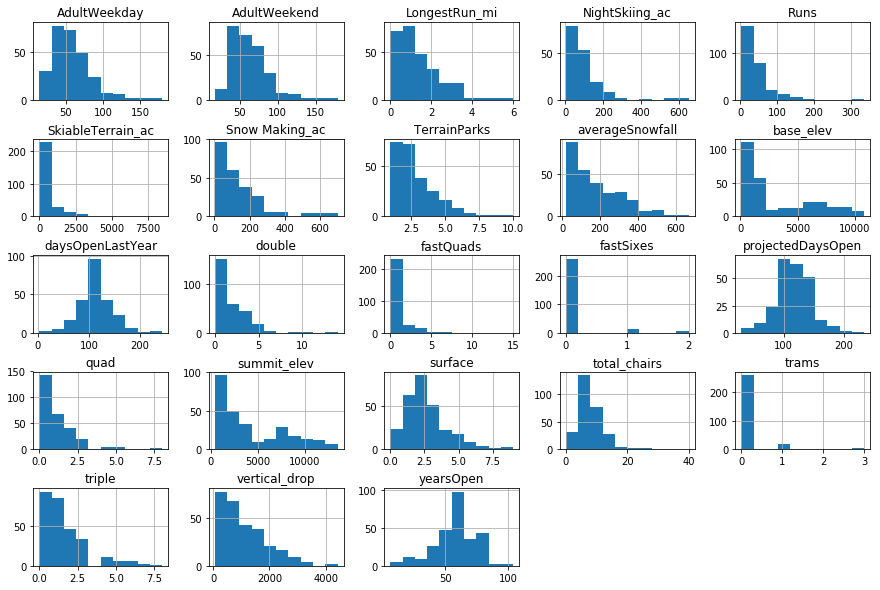

In [52]:
ski_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

After dropping a total of 49 records, distributions are much better. There are some skewed distributions, so it's worth to keep an eye on `fastQuads`, `fastSixes`, and `trams`. These lack much variance away from 0 and may have a small number of relatively extreme values. 

## 2.10 Population data<a id='2.10_Population_data'></a>

Population and area data for the US states was obtained from [wikipedia](https://simple.wikipedia.org/wiki/List_of_U.S._states). with this data we can  proceed with an analysis that includes state sizes and populations for the 'first cut' model. 

In [53]:
# read the table from the wikipedia URL 
states_url = 'https://simple.wikipedia.org/wiki/List_of_U.S._states'
usa_states = pd.read_html(states_url)

In [54]:
pd.__version__

'1.0.3'

In [55]:
type(usa_states)

list

In [56]:
len(usa_states)

1

In [57]:
usa_states = usa_states[0]
usa_states

Name &postal abbs. [1]                          Unnamed: 2_level_0  \
   Name &postal abbs. [1] Name &postal abbs. [1].1 Unnamed: 2_level_1   
0                 Alabama                      NaN                 AL   
1                  Alaska                      NaN                 AK   
2                 Arizona                      NaN                 AZ   
3                Arkansas                      NaN                 AR   
4              California                      NaN                 CA   
5                Colorado                      NaN                 CO   
6             Connecticut                      NaN                 CT   
7                Delaware                      NaN                 DE   
8                 Florida                      NaN                 FL   
9                 Georgia                      NaN                 GA   
10                 Hawaii                      NaN                 HI   
11                  Idaho                      NaN                 ID   
12               Illinois                      NaN                 IL   
13                Indiana                      NaN                 IN   
14                   Iowa                      NaN                 IA   
15                 Kansas                      NaN                 KS   
16            Kentucky[C]                      NaN                 KY   
17              Louisiana                      NaN                 LA   
18                  Maine                      NaN                 ME   
19               Maryland                      NaN                 MD   
20       Massachusetts[C]                      NaN                 MA   
21               Michigan                      NaN                 MI   
22              Minnesota                      NaN                 MN   
23            Mississippi                      NaN                 MS   
24               Missouri                      NaN                 MO   
25                Montana                      NaN                 MT   
26               Nebraska                      NaN                 NE   
27                 Nevada                      NaN                 NV   
28          New Hampshire                      NaN                 NH   
29             New Jersey                      NaN                 NJ   
30             New Mexico                      NaN                 NM   
31               New York                      NaN                 NY   
32         North Carolina                      NaN                 NC   
33           North Dakota                      NaN                 ND   
34                   Ohio                      NaN                 OH   
35               Oklahoma                      NaN                 OK   
36                 Oregon                      NaN                 OR   
37        Pennsylvania[C]                      NaN                 PA   
38           Rhode Island                      NaN                 RI   
39         South Carolina                      NaN                 SC   
40           South Dakota                      NaN                 SD   
41              Tennessee                      NaN                 TN   
42                  Texas                      NaN                 TX   
43                   Utah                      NaN                 UT   
44                Vermont                      NaN                 VT   
45            Virginia[C]                      NaN                 VA   
46             Washington                      NaN                 WA   
47          West Virginia                      NaN                 WV   
48              Wisconsin                      NaN                 WI   
49                Wyoming                      NaN                 WY   

            Cities                            Established[A] Population[B][3]  \
           Capital Largest (by population)[5] Established[A] Population[B][3]   
0       Montgomery                 Birmingha

In [58]:
# simple check, It should be a column of dates
established = usa_states.iloc[:, 5]

In [59]:
established.head()

0    Dec 14, 1819
1     Jan 3, 1959
2    Feb 14, 1912
3    Jun 15, 1836
4     Sep 9, 1850
Name: (Established[A], Established[A]), dtype: object

Extract only the state name, population, and total area (square miles) columns:

In [60]:
usa_states_sub = usa_states.iloc[:, [0,6,7]].copy()
usa_states_sub.columns = ['state', 'state_population', 'state_area_sq_miles']
usa_states_sub.head()

,state,state_population,state_area_sq_miles
0,Alabama,4903185,52420
1,Alaska,731545,665384
2,Arizona,7278717,113990
3,Arkansas,3017804,53179
4,California,39512223,163695


performing a check whether I have all the ski data states:

In [61]:
missing_states = set(state_summary.state) - set(usa_states_sub.state)
missing_states

{'Massachusetts', 'Pennsylvania', 'Virginia'}

In [62]:
usa_states_sub.state[usa_states_sub.state.str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts[C]
37     Pennsylvania[C]
38        Rhode Island
45         Virginia[C]
47       West Virginia
Name: state, dtype: object

Square brackets and their contents were interferring with this process:

In [63]:
# replace anything within square brackets (including the brackets)
usa_states_sub.iloc[:,0].replace(to_replace='\[.*\]', value='', regex=True, inplace=True)
usa_states_sub.iloc[:,0][usa_states_sub.iloc[:,0].str.contains('Massachusetts|Pennsylvania|Rhode Island|Virginia')]

20    Massachusetts
37     Pennsylvania
38     Rhode Island
45         Virginia
47    West Virginia
Name: state, dtype: object

In [64]:
# verify again, none of our states are missing 
missing_states = set(list(state_summary.iloc[:,0])) - set(list(usa_states_sub.iloc[:,0]))
missing_states

set()

empty set for missing states now. now I confidently add the population and state area columns to the ski resort data.

In [65]:
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_night_skiing_ac
0,Alaska,3,2280.0,345.0,4.0,580.0
1,Arizona,2,1577.0,237.0,6.0,80.0
2,California,21,25948.0,2738.0,81.0,587.0
3,Colorado,22,43682.0,3258.0,74.0,428.0
4,Connecticut,5,358.0,353.0,10.0,256.0


In [66]:
# merging new data in 'usa_states_sub'
state_summary = state_summary.merge(usa_states_sub,on='state',how='left')
state_summary.head()

,state,resorts_per_state,state_total_skiable_area_ac,state_total_days_open,state_total_terrain_parks,state_total_night_skiing_ac,state_population,state_area_sq_miles
0,Alaska,3,2280.0,345.0,4.0,580.0,731545,665384
1,Arizona,2,1577.0,237.0,6.0,80.0,7278717,113990
2,California,21,25948.0,2738.0,81.0,587.0,39512223,163695
3,Colorado,22,43682.0,3258.0,74.0,428.0,5758736,104094
4,Connecticut,5,358.0,353.0,10.0,256.0,3565278,5543


later I will join this with the ski resort data to explore the data, including the relationships between the states.

## 2.11 Target Feature<a id='2.11_Target_Feature'></a>

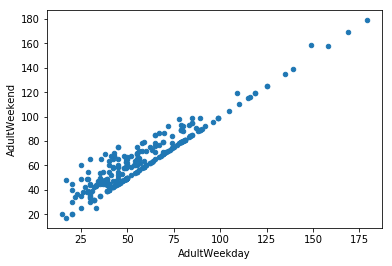

In [67]:
# scatterplot with 'AdultWeekday' on the x-axis and 'AdultWeekend' on the y-axis
ski_data.plot(x='AdultWeekday', y='AdultWeekend', kind='scatter');

There is a clear line where weekend and weekday prices are equal. Weekend prices being higher than weekday prices seem restricted to sub $100 resorts. 

In [68]:
# print the 'AdultWeekend' and 'AdultWeekday' columns for Montana only
ski_data.loc[ski_data.state == 'Montana', ['AdultWeekend', 'AdultWeekday']]

,AdultWeekend,AdultWeekday
141,42.0,42.0
142,63.0,63.0
143,49.0,49.0
144,48.0,48.0
145,46.0,46.0
146,39.0,39.0
147,50.0,50.0
148,67.0,67.0
149,47.0,47.0
150,39.0,39.0


In Montana weekday and Weekens ticket prices are equal, therfore there  isn't a reason to prefer weekend or weekday prices, so it's better to choose the one which is missing the least.

In [69]:
ski_data[['AdultWeekend', 'AdultWeekday']].isnull().sum()

AdultWeekend    4
AdultWeekday    7
dtype: int64

Weekend prices have the least missing values of the two, so drop the weekday prices and then keep just the rows that have weekend price.

In [70]:
ski_data.drop(columns='AdultWeekday', inplace=True)
ski_data.dropna(subset=['AdultWeekend'], inplace=True)

In [71]:
ski_data.shape

(277, 25)

Perform a final quick check on the data.

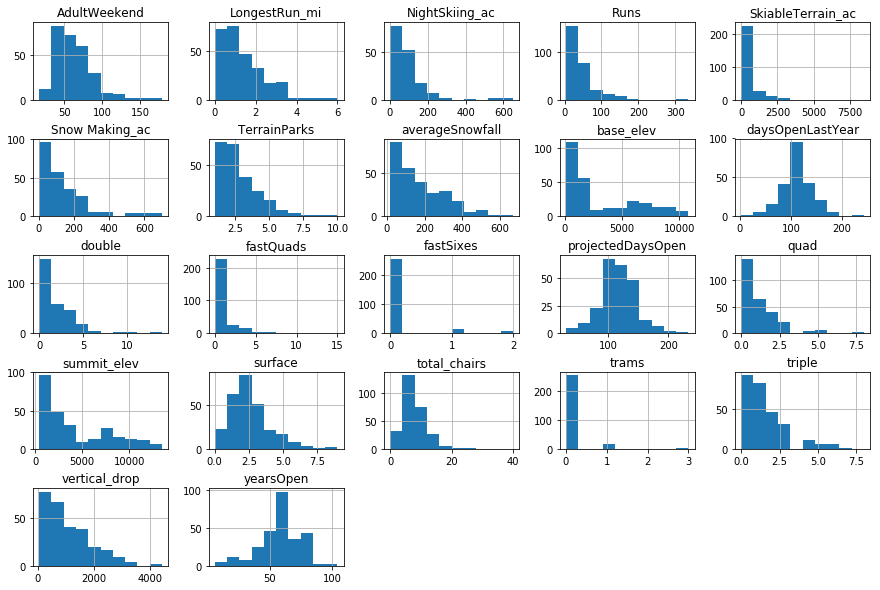

In [72]:
ski_data.hist(figsize=(15, 10))
plt.subplots_adjust(hspace=0.5);

### 2.11.1 Number Of Missing Values By Row - Resort<a id='2.11.1_Number_Of_Missing_Values_By_Row_-_Resort'></a>

Having dropped rows missing the desired target ticket price, we shall check what degree of missingness do we have for the remaining rows

In [73]:
missing = pd.concat([ski_data.isnull().sum(axis=1), 100 * ski_data.isnull().mean(axis=1)], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False).head(30)

,count,%
329,5,20.0
62,5,20.0
141,5,20.0
86,5,20.0
74,5,20.0
146,5,20.0
184,4,16.0
108,4,16.0
198,4,16.0
39,4,16.0


These seem possibly curiously quantized, as the percentage of missing values per row appear in multiples of 4.

In [74]:
missing['%'].unique()

array([ 0.,  4.,  8., 12., 16., 20.])

In [75]:
missing['%'].value_counts()

0.0     107
4.0      94
8.0      45
12.0     15
16.0     10
20.0      6
Name: %, dtype: int64

In [76]:
ski_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 329
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               277 non-null    object 
 1   Region             277 non-null    object 
 2   state              277 non-null    object 
 3   summit_elev        277 non-null    int64  
 4   vertical_drop      277 non-null    int64  
 5   base_elev          277 non-null    int64  
 6   trams              277 non-null    int64  
 7   fastSixes          277 non-null    int64  
 8   fastQuads          277 non-null    int64  
 9   quad               277 non-null    int64  
 10  triple             277 non-null    int64  
 11  double             277 non-null    int64  
 12  surface            277 non-null    int64  
 13  total_chairs       277 non-null    int64  
 14  Runs               274 non-null    float64
 15  TerrainParks       233 non-null    float64
 16  LongestRun_mi      272 non

There are still some missing values, it's good to be aware of this, but I'll leave them as is for now.

## 2.12 Save data<a id='2.12_Save_data'></a>

In [77]:
ski_data.shape

(277, 25)

Save this to your data directory, separately. Note that you were provided with the data in `raw_data` and you should saving derived data in a separate location. This guards against overwriting our original data.

In [78]:
# save the data to a new csv file
datapath = '../data'
save_file(ski_data, 'ski_data_cleaned.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data\ski_data_cleaned.csv"


In [79]:
# save the state_summary separately.
datapath = '../data'
save_file(state_summary, 'state_summary.csv', datapath)

A file already exists with this name.

Do you want to overwrite? (Y/N)Y
Writing file.  "../data\state_summary.csv"


## 2.13 Summary<a id='2.13_Summary'></a>

- we started with 330 resort records, and 27 columns
- with "big Mountain Resort" among this data
- During the data cleaning process, some feature columns as well as some record lines were removed. these include:
1.	*fastEight* column- half the values are missing, and all but one resort having zero ‘fastEight’ seat. There is essentially no information in this column
2.	*Weekday* column- Weekend prices have the least missing values of the two (4 vs 7 missing) therefore we chose to drop the weenday prices column.
3. data record of “Pine Knob Ski Resort” in Michigan, was removed due to it’s unclear 'Years Open' data(=2019). No resort will have been open for 2019 years, and beacause we don’t know when this data was gathered, we can say whether it  has been open zero or two years. Anyway the smallest number of years open otherwise is 6, so we decided not to consider resort that may not have been opened yet, or perhaps in its first season.
4. After deriving all state-wide statistics, we dropped all rows with missing price information, that were about 14.33% of the rows.  (48 rows, including previosly removed record of 'Heavenly Mountain Resort’ that was removed during 'snow making_ac' outlier value inspection.)
- Other issue found, Skiable erea in ac caused a concern because values were clustered down the low end. after further exploring, Silverton Mountain Resort had highly suspicious 26,819 skiable terrain in ac, the value I’ve looked up in other data scorce was 1819 ac. this led to the data correction step: the suspect value was replaced with the new one I've obtained.
  


- By knowing that state-wide supply and demand of certain skiing resources may well factor into pricing strategies, We derived state-wide  summary statistics to try and answer  whether our resort dominates certain domain?  state-wide derived data includes:
 1. resorts_per_state
 2.  state_total_skiable_area_ac
 3.   state_total_days_open
 4.  state_total_terrain_parks
 5.   state_total_night_skiing_ac
 
 
 

- At this stage of the project, we left with 227 resort recods to work on. And the data science problem I subsequently identified is to predict the adult weekend ticket price for ski resorts.   